In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import netCDF4
import xarray as xr
import hmp
from pathlib import Path
from mne.io import read_info
from mne import read_epochs
from hmpai.data import StageFinder
import os
DATA_PATH = Path(os.getenv("DATA_PATH"))

In [2]:
# info_path = DATA_PATH / "sat2/preprocessed_500hz/preprocessed_S1_raw.fif"
info_path = DATA_PATH / "sat2/preprocessed_500hz/S1_epo.fif"
# info_path = DATA_PATH / "sat1/preprocessed/processed_0001_epo.fif"
positions = read_info(info_path)

epoch = read_epochs(info_path)
epoch.set_montage("biosemi64")
positions = epoch.info

Reading /workspace/data_local/sat2/preprocessed_500hz/S1_epo.fif ...


    Found the data of interest:
        t =    -300.00 ...    4000.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
2376 matching events found
No baseline correction applied
0 projection items activated


#### Task 1

In [4]:
cpus = 4

epoched_data_path = DATA_PATH / "prp/Data_t1_250Hz.nc"

# TODO: Conditions + labels
conditions = ["short", "long"]
labels = {"short": ["negative", "t1_1", "t1_2", "t1_3", "t1_4"], "long": ["negative", "t1_1", "t1_2", "t1_3", "t1_4"]}

stage_finder = StageFinder(
    epoched_data_path,
    labels,
    conditions=conditions,
    cpus=cpus,
    fit_function="fit",  # n_events is extracted from the amount of labels in 'conditions' variable
    verbose=False,
    condition_variable="condition",
    condition_method="equal",
    fits_to_load=["250hz_t1_short.nc", "250hz_t1_long.nc"],
    n_comp=10,
    event_width=40,
)
# Retraining model with smaller window
stage_finder.fit_model()

Transforming epoched data to principal component (PC) space
Loading fitted HMP model for short condition
Loading fitted HMP model for long condition


(<Figure size 3600x900 with 2 Axes>,
 array([<Axes: >, <Axes: xlabel='Time (in ms)'>], dtype=object))

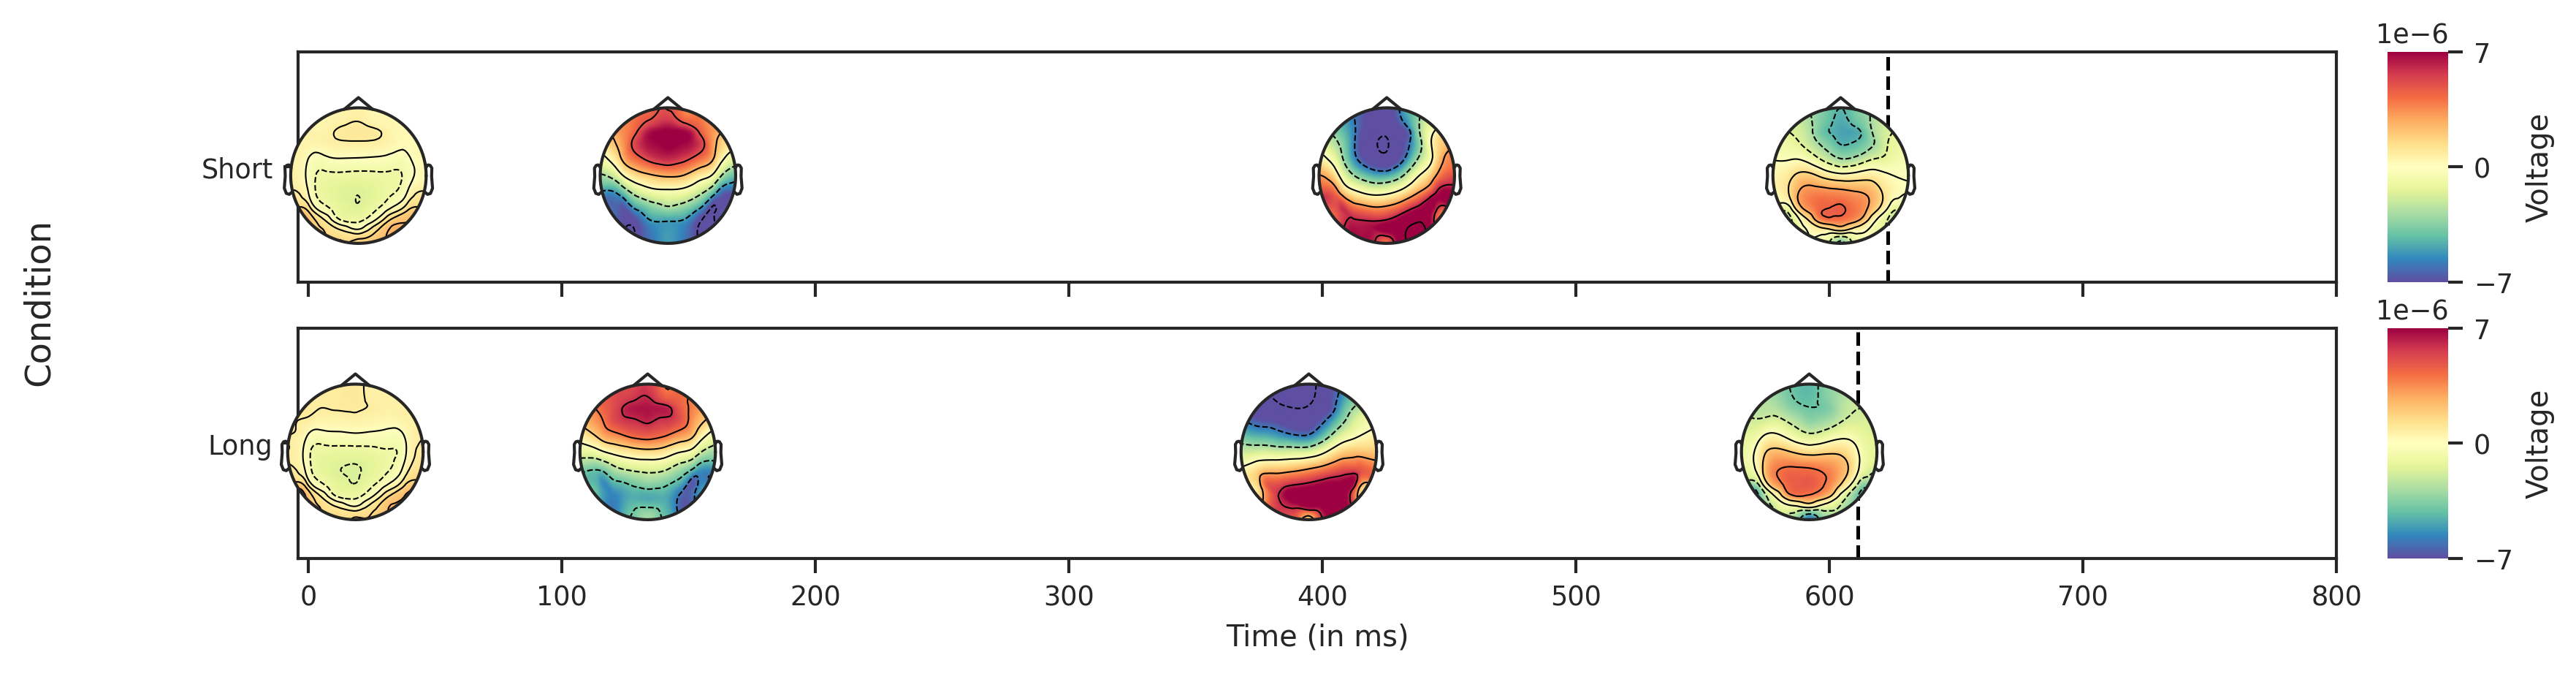

In [4]:
stage_finder.visualize_model(positions, max_time=800)

In [5]:
hmp.utils.save_fit(stage_finder.fits[0], "250hz_t1_short.nc")
hmp.utils.save_fit(stage_finder.fits[1], "250hz_t1_long.nc")

250hz_t1_short.nc saved
250hz_t1_long.nc saved


In [5]:
output_path = DATA_PATH / "prp/stage_data_250hz_t1.nc"
stage_data = stage_finder.label_model(
    label_fn=stage_finder.__label_model_probabilistic__, probabilistic=True
)

Labeling dataset for short condition
Processing participant VP10_epo_t1
Processing participant VP11_epo_t1
Processing participant VP12_epo_t1
Processing participant VP13_epo_t1
Processing participant VP14_epo_t1
Processing participant VP15_epo_t1
Processing participant VP16_epo_t1
Processing participant VP17_epo_t1
Processing participant VP18_epo_t1
Processing participant VP19_epo_t1
Processing participant VP1_epo_t1
Processing participant VP20_epo_t1
Processing participant VP21_epo_t1
Processing participant VP22_epo_t1
Processing participant VP23_epo_t1
Processing participant VP24_epo_t1
Processing participant VP2_epo_t1
Processing participant VP3_epo_t1
Processing participant VP5_epo_t1
Processing participant VP8_epo_t1
Processing participant VP9_epo_t1
Labeling dataset for long condition
Processing participant VP10_epo_t1
Processing participant VP11_epo_t1
Processing participant VP12_epo_t1
Processing participant VP13_epo_t1
Processing participant VP14_epo_t1
Processing participant 

In [7]:
stage_data.to_netcdf(output_path)

#### Task 2

In [8]:
cpus = 4

epoched_data_path = DATA_PATH / "prp/Data_t2_2_250Hz.nc"

# TODO: Conditions + labels
conditions = ["short", "long"]
labels = {"short": ["negative", "t2_1", "t2_2", "t2_3"], "long": ["negative", "t2_1", "t2_2", "t2_3"]}

stage_finder = StageFinder(
    epoched_data_path,
    labels,
    conditions=conditions,
    cpus=cpus,
    fit_function="fit",  # n_events is extracted from the amount of labels in 'conditions' variable
    verbose=False,
    condition_variable="condition",
    condition_method="equal",
    fits_to_load=["250hz_t2_short.nc", "250hz_t2_long.nc"],
    n_comp=10,
    event_width=40,
)
# Retraining model with smaller window
stage_finder.fit_model()

Transforming epoched data to principal component (PC) space
Loading fitted HMP model for short condition
Loading fitted HMP model for long condition


(<Figure size 3600x900 with 2 Axes>,
 array([<Axes: >, <Axes: xlabel='Time (in ms)'>], dtype=object))

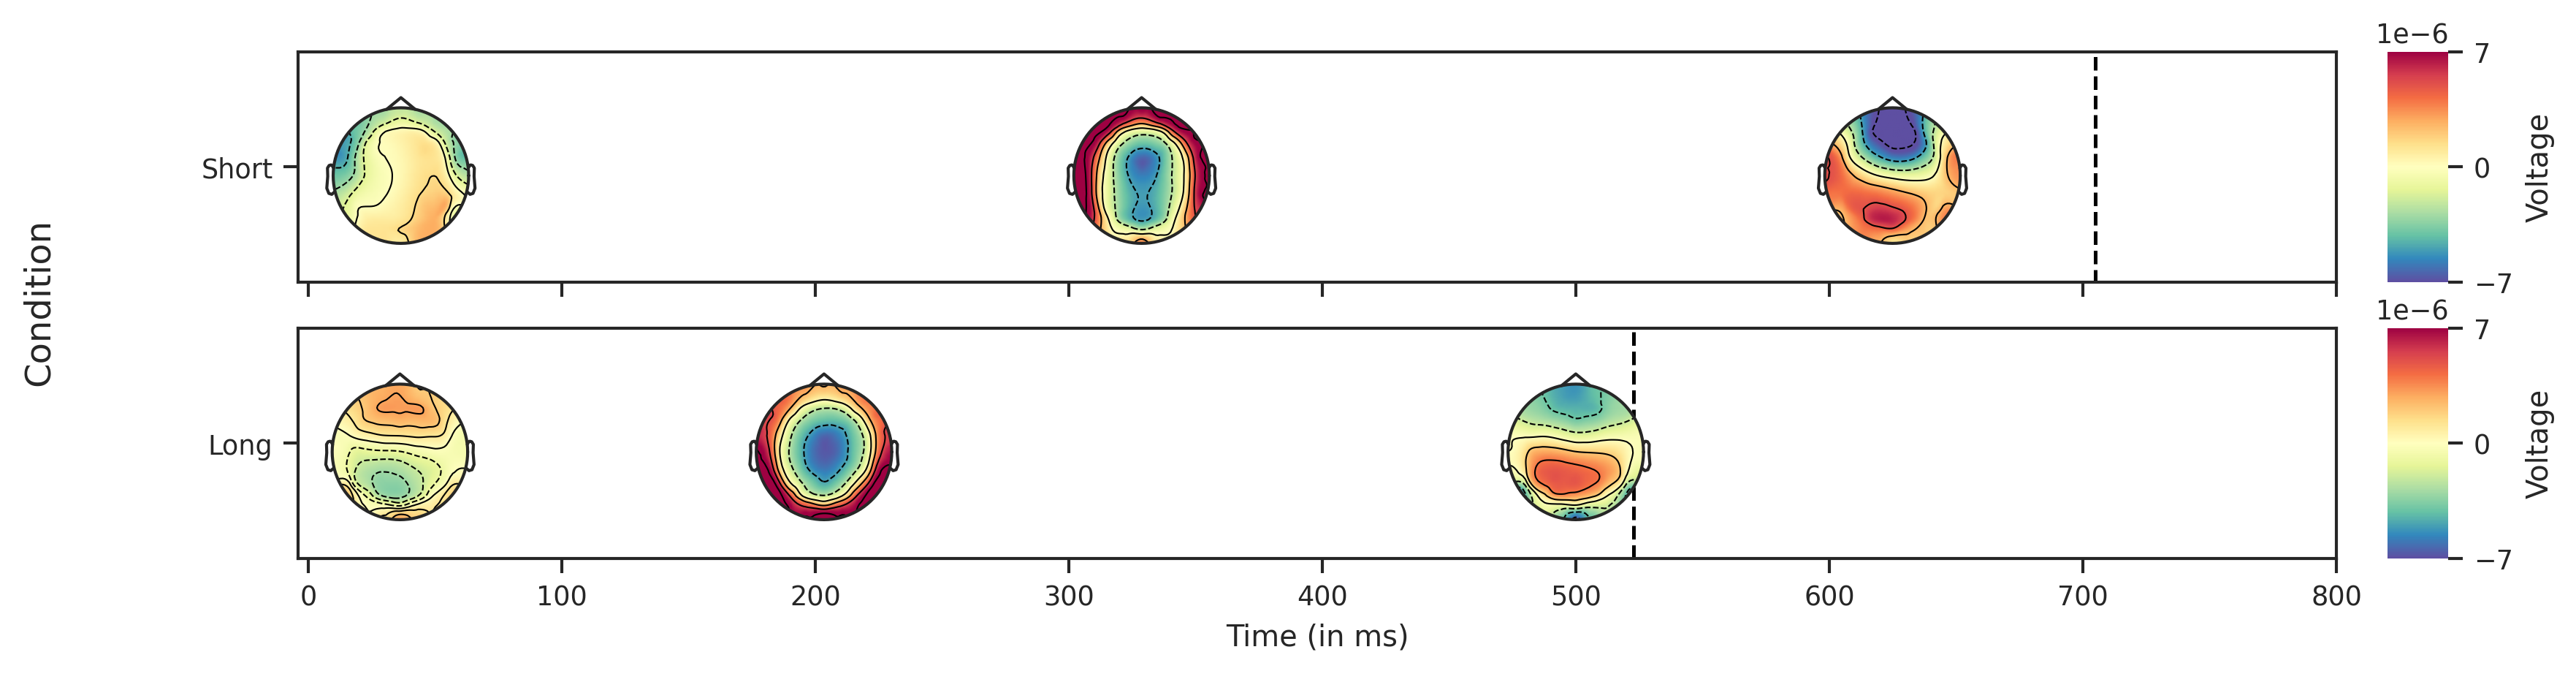

In [9]:
stage_finder.visualize_model(positions, max_time=800)

In [10]:
hmp.utils.save_fit(stage_finder.fits[0], "250hz_t2_short.nc")
hmp.utils.save_fit(stage_finder.fits[1], "250hz_t2_long.nc")

250hz_t2_short.nc saved
250hz_t2_long.nc saved


In [9]:
output_path = DATA_PATH / "prp/stage_data_250hz_t2.nc"
stage_data = stage_finder.label_model(
    label_fn=stage_finder.__label_model_probabilistic__, probabilistic=True
)

Labeling dataset for short condition
Processing participant VP10_epo_t2_2
Processing participant VP11_epo_t2_2
Processing participant VP12_epo_t2_2
Processing participant VP13_epo_t2_2
Processing participant VP14_epo_t2_2
Processing participant VP15_epo_t2_2
Processing participant VP16_epo_t2_2
Processing participant VP17_epo_t2_2
Processing participant VP18_epo_t2_2
Processing participant VP19_epo_t2_2
Processing participant VP1_epo_t2_2
Processing participant VP20_epo_t2_2
Processing participant VP21_epo_t2_2
Processing participant VP22_epo_t2_2
Processing participant VP23_epo_t2_2
Processing participant VP24_epo_t2_2
Processing participant VP2_epo_t2_2
Processing participant VP3_epo_t2_2
Processing participant VP5_epo_t2_2
Processing participant VP8_epo_t2_2
Processing participant VP9_epo_t2_2
Labeling dataset for long condition
Processing participant VP10_epo_t2_2
Processing participant VP11_epo_t2_2
Processing participant VP12_epo_t2_2
Processing participant VP13_epo_t2_2
Processi

In [10]:
stage_data.to_netcdf(output_path)

In [3]:
paths = [DATA_PATH / "prp/stage_data_250hz_t1.nc", DATA_PATH / "prp/stage_data_250hz_t2.nc", DATA_PATH / "prp/Data_trial_250Hz.nc"]

for path in paths:
    output = path.with_suffix(".tmp.nc")
    with xr.open_dataset(path) as ds:
        ds['participant'] = [participant.split('_')[0] for participant in list(ds['participant'].values)]
        ds.to_netcdf(output)